# Задание 8

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

from functions.diffEquationSolver import Euler

In [9]:
a, b, c, d = 998, 1998, -999, -1999
f = lambda t, u, v: np.array([a * u + b * v,
                              c * u + d * v])

In [10]:
np.linalg.eig([[a, b], [c, d]])

(array([   -1., -1000.]),
 array([[ 0.89442719, -0.70710678],
        [-0.4472136 ,  0.70710678]]))

## Find analytic solution:

$\begin{cases}
    u(t) = 2(u_0 + v_0)e^{-t} + (-u_0 - 2v_0)e^{-1000t}\\
    v(t) = -(u_0 + v_0)e^{-t} - (-u_0 - 2v_0)e^{-1000t}
\end{cases}$
where $u_0 = u(0), v_0 = v(0)$

## Start params

In [53]:
N = int(1e2)
T = 10
h = T / N
t = np.arange(0, T, h)

## Ground Truth solution

In [54]:
def gt(t, S0):
    u0 = S0[0]
    v0 = S0[1]
    alpha = (u0 + v0)
    beta = (-u0 - 2*v0)
    u = 2 * alpha * np.exp(-t) + beta * np.exp(-1000 * t)
    v = - alpha * np.exp(-t) - beta * np.exp(-1000 * t)
    return np.array([u, v])

### Explicit Euler

In [61]:
S0 = np.array([1, 1])

S = np.zeros((S0.size, t.size))

S[:,0] = S0

for i in range(len(t) - 1):
    S[:, i + 1] = Euler(S[:, i], f, t[i], h)

In [62]:
S_gt = gt(t, S0) # analytic solution

Text(0.5, 0, 'T')

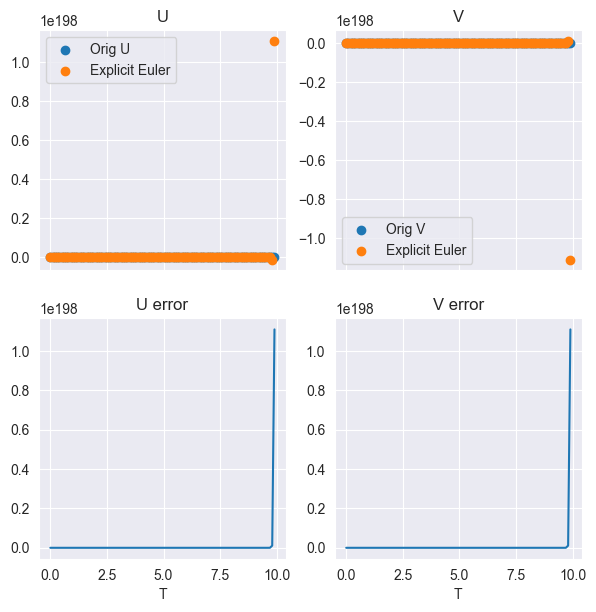

In [63]:
fg, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=100, sharex=True)

ax[0, 0].set_title("U")
ax[0, 0].scatter(t, S_gt[0], label="Orig U")
ax[0, 0].scatter(t, S[0], label='Explicit Euler')
ax[0, 0].legend(loc="best")
# ax[0, 0].set_xlim([0, 1e-2])

ax[0, 1].set_title("V")
ax[0, 1].scatter(t, S_gt[1], label="Orig V")
ax[0, 1].scatter(t, S[1], label='Explicit Euler')
ax[0, 1].legend(loc="best")
# ax[0, 1].set_xlim([0, 1e-2])

ax[1, 0].set_title("U error")
ax[1, 0].plot(t, np.abs(S_gt[0] - S[0]))

ax[1, 1].set_title("V error")
ax[1, 1].plot(t, np.abs(S_gt[1] - S[1]))


ax[1, 0].set_xlabel("T")
ax[1, 1].set_xlabel("T")

### Implicit Euler

In [64]:
def implicitEuler(u, f, t, dt):
    J = np.array([[a, b], [c, d]])
    E = np.eye(2) #матрица с 2 на дианонали
    
    mat = np.linalg.inv(E / dt - J)
    return u + np.dot(mat, f(t, *u)) #скал произв

In [65]:
for i in range(len(t) - 1):
    S[:, i + 1] = implicitEuler(S[:, i], f, t[i], h)

Text(0.5, 0, 'T')

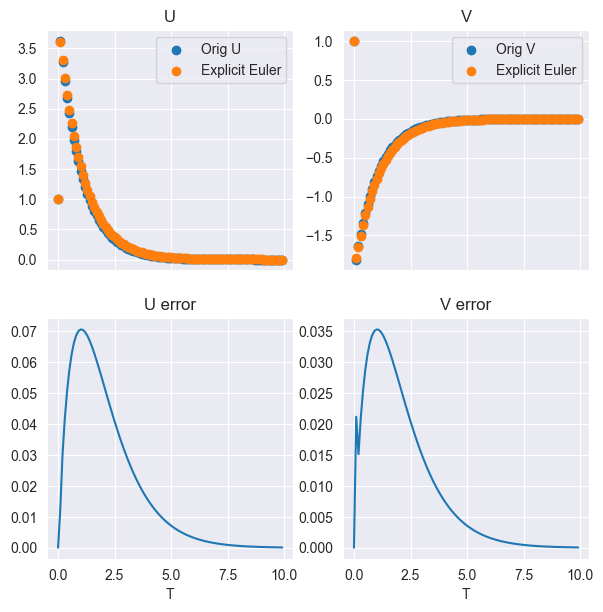

In [67]:
fg, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=100, sharex=True)

ax[0, 0].set_title("U")
ax[0, 0].scatter(t, S_gt[0], label="Orig U")
ax[0, 0].scatter(t, S[0], label='Explicit Euler')
ax[0, 0].legend(loc="best")
# ax[0, 0].set_xlim([0, 1e-2])

ax[0, 1].set_title("V")
ax[0, 1].scatter(t, S_gt[1], label="Orig V")
ax[0, 1].scatter(t, S[1], label='Explicit Euler')
ax[0, 1].legend(loc="best")
# ax[0, 1].set_xlim([0, 1e-2])

ax[1, 0].set_title("U error")
ax[1, 0].plot(t, np.abs(S_gt[0] - S[0]))

ax[1, 1].set_title("V error")
ax[1, 1].plot(t, np.abs(S_gt[1] - S[1]))


ax[1, 0].set_xlabel("T")
ax[1, 1].set_xlabel("T")